<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this IBM Machine Learning course.

We load a dataset using Pandas library, apply the following algorithms and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:

In [1]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing, metrics, tree, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.externals.six import StringIO
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, jaccard_similarity_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
%matplotlib inline

# About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Let's download the dataset:

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-04-28 18:05:32--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-04-28 18:05:32 (11.4 MB/s) - ‘loan_train.csv’ saved [23101/23101]



## Load data from CSV file  

In [3]:
dF=pd.read_csv('loan_train.csv')
dF.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
print('Dataframe size:',dF.shape)

Dataframe size: (346, 10)


In [5]:
dF.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

## Clean and fix raw data

In [6]:
df=dF.drop(columns='Unnamed: 0')
df.columns=['Loan','Status','Principal','Terms','Effective','Due','Age','Education','Gender']
df=df.replace({'Bechalor': 'Bachelor', 'college': 'College'})
df.head()

,Loan,Status,Principal,Terms,Effective,Due,Age,Education,Gender
0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bachelor,female
2,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,College,male
3,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,College,female
4,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,College,male


## Convert to date time object 

In [7]:
df['Effective']=pd.to_datetime(df['Effective'])
df['Due']=pd.to_datetime(df['Due'])
df.head()

,Loan,Status,Principal,Terms,Effective,Due,Age,Education,Gender
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelor,female
2,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,College,male
3,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,College,female
4,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,College,male


# Data visualization and pre-processing

Let’s see how many of each class is in our data set:

In [8]:
df['Status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: Status, dtype: int64

75% people have paid off the loan on time, while 25% people have gone into collection; let's plot some dataset columns to underestand data better.

## Demographics

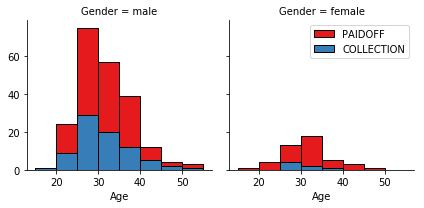

In [9]:
bins=np.linspace(15,55,9)
g=sn.FacetGrid(df,col="Gender",hue="Status",palette="Set1",col_wrap=2)
g.map(plt.hist,'Age',bins=bins,ec="k")
g.axes[-1].legend()
plt.show()

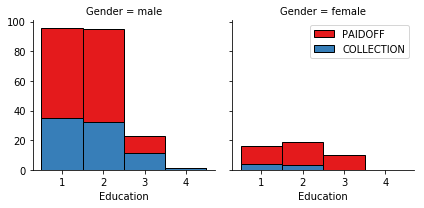

Levels: 1="High School or Below", 2="College", 3="Bachelor", 4="Master or Above"



In [10]:
dfe=df.replace({'High School or Below': 1, 'College': 2, 'Bachelor': 3, 'Master or Above': 4})
bins=np.linspace(1,5,5)
g=sn.FacetGrid(dfe,col="Gender",hue="Status",palette="Set1",col_wrap=2)
g.map(plt.hist,'Education',bins=bins,ec="k",align='left')
g.axes[-1].legend()
plt.show()
print('Levels: 1="High School or Below", 2="College", 3="Bachelor", 4="Master or Above"\n')

## Finance

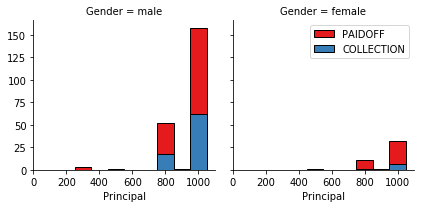

In [11]:
bins=np.linspace(100,1100,11)
g=sn.FacetGrid(df,col="Gender",hue="Status",palette="Set1",col_wrap=2)
g.map(plt.hist,'Principal',bins=bins,ec="k",align='left')
g.axes[-1].legend()
plt.show()

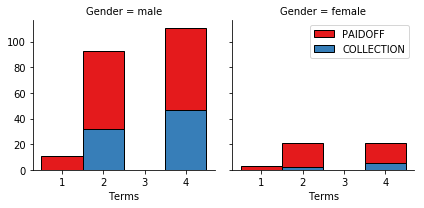

Weeks: 1="weekly (7 days)", 2="biweekly (15 days)", 4="monthly (30 days)"



In [12]:
dfe=dfe.replace({'Terms': {7: 1, 15: 2, 30: 4}})
bins=np.linspace(1,5,5)
g=sn.FacetGrid(dfe,col="Gender",hue="Status",palette="Set1",col_wrap=2)
g.map(plt.hist,'Terms',bins=bins,ec="k",align='left')
g.axes[-1].legend()
plt.show()
print('Weeks: 1="weekly (7 days)", 2="biweekly (15 days)", 4="monthly (30 days)"\n')

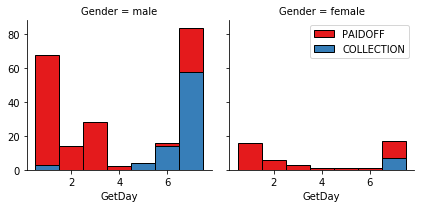

Weekdays: 1 to 7 ("Monday" to "Sunday")



In [13]:
dfe['GetDay']=dfe['Effective'].dt.dayofweek+1
bins=np.linspace(1,8,8)
g=sn.FacetGrid(dfe,col="Gender",hue="Status",palette="Set1",col_wrap=2)
g.map(plt.hist,'GetDay',bins=bins,ec="k",align='left')
g.axes[-1].legend()
plt.show()
print('Weekdays: 1 to 7 ("Monday" to "Sunday")\n')

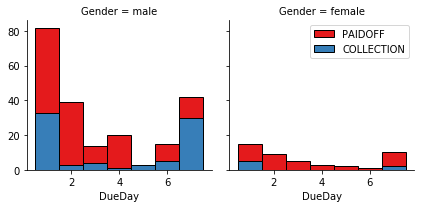

Weekdays: 1 to 7 ("Monday" to "Sunday")



In [14]:
dfe['DueDay']=dfe['Due'].dt.dayofweek+1
bins=np.linspace(1,8,8)
g=sn.FacetGrid(dfe,col="Gender",hue="Status",palette="Set1",col_wrap=2)
g.map(plt.hist,'DueDay',bins=bins,ec="k",align='left')
g.axes[-1].legend()
plt.show()
print('Weekdays: 1 to 7 ("Monday" to "Sunday")\n')

# Convert categorical features to numerical values

Let's convert to numerical values the Gender (0="male", 1="female") as well as the Terms and Weekdays as per the histograms above (see the relative legends):

In [15]:
dfe=dfe[['Loan','Status','Principal','Terms','GetDay','DueDay','Gender','Age','Education']]
dfe=dfe.replace({'male': 0, 'female': 1})
dfe.head()

,Loan,Status,Principal,Terms,GetDay,DueDay,Gender,Age,Education
0,0,PAIDOFF,1000,4,4,5,0,45,1
1,2,PAIDOFF,1000,4,4,5,1,33,3
2,3,PAIDOFF,1000,2,4,4,0,27,2
3,4,PAIDOFF,1000,4,5,6,1,28,2
4,6,PAIDOFF,1000,4,5,6,0,29,2


## One Hot Encoding

One Hot Encoding may also be used to convert categorical variables (e.g., Education) to binary variables and append them to the feature dataframe:

In [16]:
ohe=dfe.drop(columns=['Education'])
ohe=pd.concat([ohe,pd.get_dummies(df['Education'])],axis=1)
ohe.head()

,Loan,Status,Principal,Terms,GetDay,DueDay,Gender,Age,Bachelor,College,High School or Below,Master or Above
0,0,PAIDOFF,1000,4,4,5,0,45,0,0,1,0
1,2,PAIDOFF,1000,4,4,5,1,33,1,0,0,0
2,3,PAIDOFF,1000,2,4,4,0,27,0,1,0,0
3,4,PAIDOFF,1000,4,5,6,1,28,0,1,0,0
4,6,PAIDOFF,1000,4,5,6,0,29,0,1,0,0


Education with "Master or Above" may be dropped, since statistically irrelevant (just 2 cases); however, it is kept for generality.

# Prepare feature

Let's collect all relevant columns so far:

In [17]:
dfe.head()

,Loan,Status,Principal,Terms,GetDay,DueDay,Gender,Age,Education
0,0,PAIDOFF,1000,4,4,5,0,45,1
1,2,PAIDOFF,1000,4,4,5,1,33,3
2,3,PAIDOFF,1000,2,4,4,0,27,2
3,4,PAIDOFF,1000,4,5,6,1,28,2
4,6,PAIDOFF,1000,4,5,6,0,29,2


## Extraction

As most people who did not pay the loan off (both male and female) got it at the end of the week, Feature Binarization may be used to set a "Weekend" threshold value less than day 4 (i.e., "Friday"):

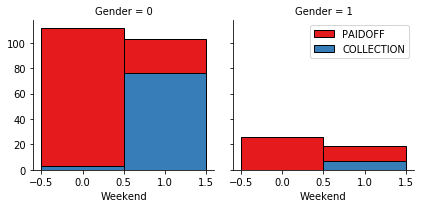

Binarization: 0 ("Monday" to "Thursday"), 1 ("Friday" to "Sunday")



In [18]:
dfe['Weekend']=dfe['GetDay'].apply(lambda x: 1 if (x>4) else 0)
bins=np.linspace(0,2,3)
g=sn.FacetGrid(dfe,col="Gender",hue="Status",palette="Set1",col_wrap=2)
g.map(plt.hist,'Weekend',bins=bins,ec="k",align='left')
g.axes[-1].legend()
plt.show()
print('Binarization: 0 ("Monday" to "Thursday"), 1 ("Friday" to "Sunday")\n')

So, the relevant columns become:

In [19]:
dff=dfe[['Principal','Terms','Weekend','Gender','Age','Education']]
dfe=dfe.drop(columns=['Weekend'])
dff.head()

,Principal,Terms,Weekend,Gender,Age,Education
0,1000,4,0,0,45,1
1,1000,4,0,1,33,3
2,1000,2,0,0,27,2
3,1000,4,1,1,28,2
4,1000,4,1,0,29,2


## Selection

Let's define feature and target as arrays:

In [20]:
y=np.asarray(dfe['Status'].values)
X=np.asarray(dff.values.astype(float))
print(X[0:5])
print(y[0:5])

[[ 1000.     4.     0.     0.    45.     1.]
 [ 1000.     4.     0.     1.    33.     3.]
 [ 1000.     2.     0.     0.    27.     2.]
 [ 1000.     4.     1.     1.    28.     2.]
 [ 1000.     4.     1.     0.    29.     2.]]
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


## Normalization

In order to regularize the problem and prevent numerical issues, Data Standardization may be used to get zero-mean and unit-variance data (this shall technically be done after train-test data split, but it may be performed at this stage already for sufficiently large data sets):

In [21]:
XN=preprocessing.StandardScaler().fit(X).transform(X)
print(XN[0:5])

[[ 0.51578458  0.92271235 -1.20577805 -0.42056004  2.33152555 -0.99512471]
 [ 0.51578458  0.92271235 -1.20577805  2.37778177  0.34170148  1.83872837]
 [ 0.51578458 -0.96639104 -1.20577805 -0.42056004 -0.65321055  0.42180183]
 [ 0.51578458  0.92271235  0.82934003  2.37778177 -0.48739188  0.42180183]
 [ 0.51578458  0.92271235  0.82934003 -0.42056004 -0.3215732   0.42180183]]


# Classification

Now use the training set to build an accurate model, then use the test set to report the accuracy of the model; the following algorithms shall be employed:
- K Nearest Neighbors (KNN)
- Decision Tree
- Support Vector Machine (SVM)
- Logistic Regression

__ Notice:__ 
- you may change the pre-processing and format, feature selection and extraction, etc., in order to build a better model;
- you should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms in the next cells;
- you should find the best __k__ to build the classification models with the highest accuracy and lowest computational costs;
- you should not use the __loan_test.csv__ for finding the best k, but you may split your __train_loan.csv__ into "train" and "test" subsets.

## Data split

In order to build and test statistically significant classification models without investigating many random subsets and then averaging the results, the classification algorithms are trained and validated on 2/3 and 1/3 of the data (casually split), respectively.

In [22]:
X_train,X_valid,y_train,y_valid=train_test_split(XN,y,test_size=1/3,random_state=1)
print('Training subset: X',X_train.shape,'; y',y_train.shape)
print('Validation subset: X',X_valid.shape,'; y',y_valid.shape)

Training subset: X (230, 6) ; y (230,)
Validation subset: X (116, 6) ; y (116,)


## K-Nearest-Neighbors (KNN)

Let's find the lowest number of k nearest neighbors providing the highest model accuracy (with the relative precision, in terms of standard deviation); since 'PAIDOFF' cases are much more than 'COLLECTION' cases in the available data, the (adjusted) balanced accuracy score is also calculated and selected as the figure of merit:

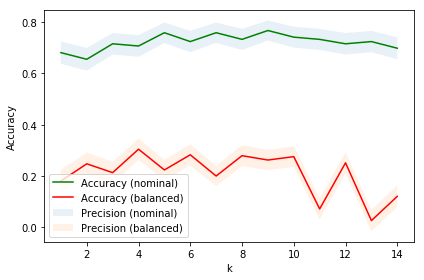

Maximum nominal accuracy 0.767 (with 0.039 precision) with at least k = 9 nearest neighbors
Maximum balanced accuracy 0.305 (with 0.042 precision) with at least k = 4 nearest neighbors


In [23]:
Ks=15
mean_acc=np.zeros(Ks-1)
bal_acc=np.zeros(Ks-1)
std_acc=np.zeros(Ks-1)
for n in range(1,Ks):
    neigh=KNeighborsClassifier(algorithm='auto',n_neighbors=n,weights='uniform').fit(X_train,y_train)
    yhat=neigh.predict(X_valid)
    mean_acc[n-1]=metrics.accuracy_score(y_valid,yhat)
    bal_acc[n-1]=cohen_kappa_score(y_valid,yhat)
    std_acc[n-1]=np.std(yhat==y_valid)/np.sqrt(yhat.shape[0])
plt.plot(range(1,Ks),mean_acc,'g')
plt.plot(range(1,Ks),bal_acc,'r')
plt.fill_between(range(1,Ks),mean_acc-std_acc,mean_acc+std_acc,alpha=0.10)
plt.fill_between(range(1,Ks),bal_acc-std_acc,bal_acc+std_acc,alpha=0.10)
plt.legend(('Accuracy (nominal)','Accuracy (balanced)','Precision (nominal)','Precision (balanced)'))
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.tight_layout()
plt.show()
bestKn=mean_acc.argmax()+1
bestKb=bal_acc.argmax()+1
print("Maximum nominal accuracy",round(mean_acc[bestKn-1],3),"(with",round(std_acc[bestKn-1],3),
      "precision) with at least k =",bestKn,"nearest neighbors")
print("Maximum balanced accuracy",round(bal_acc[bestKb-1],3),"(with",round(std_acc[bestKb-1],3),
      "precision) with at least k =",bestKb,"nearest neighbors")
bestKNN=KNeighborsClassifier(algorithm='auto',n_neighbors=bestKb,weights='uniform').fit(X_train,y_train)

Actual      COLLECTION  PAIDOFF
Predicted                      
COLLECTION          17       24
PAIDOFF             10       65


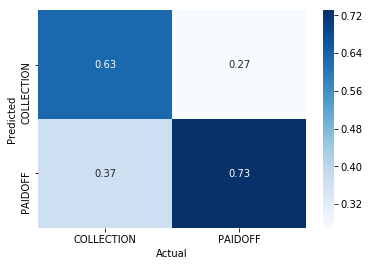

In [24]:
confV=pd.crosstab(bestKNN.predict(X_valid),y_valid,rownames=['Predicted'],colnames=['Actual'])
sn.heatmap(confV/confV.sum(axis=0),annot=True,cmap="Blues")
print(confV)

## Decision Tree

Let's find the lowest number of k decision levels providing the highest model accuracy (with the relative precision, in terms of standard deviation); since 'PAIDOFF' cases are much more than 'COLLECTION' cases in the available data, the (adjusted) balanced accuracy score is also calculated and selected as the figure of merit:

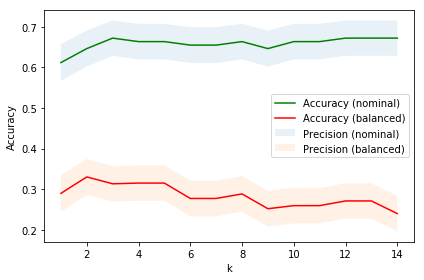

Maximum nominal accuracy 0.672 (with 0.044 precision) with at least k = 3 decision levels
Maximum balanced accuracy 0.33 (with 0.044 precision) with at least k = 2 decision levels


In [25]:
Ks=15
mean_acc=np.zeros(Ks-1)
bal_acc=np.zeros(Ks-1)
std_acc=np.zeros(Ks-1)
for n in range(1,Ks):    
    detree=DecisionTreeClassifier(criterion="gini",max_depth=n,class_weight='balanced').fit(X_train,y_train)
    yhat=detree.predict(X_valid)
    mean_acc[n-1]=metrics.accuracy_score(y_valid,yhat)
    bal_acc[n-1]=cohen_kappa_score(y_valid,yhat)
    std_acc[n-1]=np.std(yhat==y_valid)/np.sqrt(yhat.shape[0])
plt.plot(range(1,Ks),mean_acc,'g')
plt.plot(range(1,Ks),bal_acc,'r')
plt.fill_between(range(1,Ks),mean_acc-std_acc,mean_acc+std_acc,alpha=0.10)
plt.fill_between(range(1,Ks),bal_acc-std_acc,bal_acc+std_acc,alpha=0.10)
plt.legend(('Accuracy (nominal)','Accuracy (balanced)','Precision (nominal)','Precision (balanced)'))
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.tight_layout()
plt.show()
bestKn=mean_acc.argmax()+1
bestKb=bal_acc.argmax()+1
print("Maximum nominal accuracy",round(mean_acc[bestKn-1],3),"(with",round(std_acc[bestKn-1],3),
      "precision) with at least k =",bestKn,"decision levels")
print("Maximum balanced accuracy",round(bal_acc[bestKb-1],3),"(with",round(std_acc[bestKb-1],3),
      "precision) with at least k =",bestKb,"decision levels")
bestDT=DecisionTreeClassifier(criterion="gini",max_depth=bestKb,class_weight='balanced').fit(X_train,y_train)

Actual      COLLECTION  PAIDOFF
Predicted                      
COLLECTION          25       39
PAIDOFF              2       50


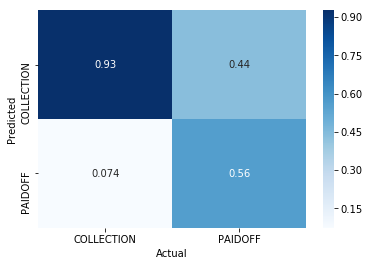

In [26]:
confV=pd.crosstab(bestDT.predict(X_valid),y_valid,rownames=['Predicted'],colnames=['Actual'])
sn.heatmap(confV/confV.sum(axis=0),annot=True,cmap="Blues")
print(confV)

## Support Vector Machine

Let's find the largest penalty parameter C providing the highest model accuracy (with the relative precision, in terms of standard deviation); since 'PAIDOFF' cases are much more than 'COLLECTION' cases in the available data, the (adjusted) balanced accuracy score is also calculated and selected as the figure of merit:

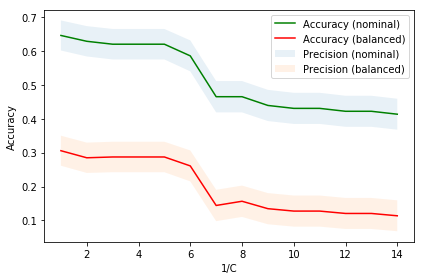

Maximum nominal accuracy 0.647 (with 0.044 precision) with at least 1/C = 1 inverse penalty parameter
Maximum balanced accuracy 0.306 (with 0.044 precision) with at least 1/C = 1 inverse penalty parameter


In [27]:
Ks=15
mean_acc=np.zeros(Ks-1)
bal_acc=np.zeros(Ks-1)
std_acc=np.zeros(Ks-1)
for n in range(1,Ks):    
    suvema=svm.SVC(C=1/n,kernel='poly',class_weight='balanced',gamma='auto').fit(X_train,y_train)
    yhat=suvema.predict(X_valid)
    mean_acc[n-1]=metrics.accuracy_score(y_valid,yhat)
    bal_acc[n-1]=cohen_kappa_score(y_valid,yhat)
    std_acc[n-1]=np.std(yhat==y_valid)/np.sqrt(yhat.shape[0])
plt.plot(range(1,Ks),mean_acc,'g')
plt.plot(range(1,Ks),bal_acc,'r')
plt.fill_between(range(1,Ks),mean_acc-std_acc,mean_acc+std_acc,alpha=0.10)
plt.fill_between(range(1,Ks),bal_acc-std_acc,bal_acc+std_acc,alpha=0.10)
plt.legend(('Accuracy (nominal)','Accuracy (balanced)','Precision (nominal)','Precision (balanced)'))
plt.ylabel('Accuracy')
plt.xlabel('1/C')
plt.tight_layout()
plt.show()
bestKn=mean_acc.argmax()+1
bestKb=bal_acc.argmax()+1
print("Maximum nominal accuracy",round(mean_acc[bestKn-1],3),"(with",round(std_acc[bestKn-1],3),
      "precision) with at least 1/C =",bestKn,"inverse penalty parameter")
print("Maximum balanced accuracy",round(bal_acc[bestKb-1],3),"(with",round(std_acc[bestKb-1],3),
      "precision) with at least 1/C =",bestKb,"inverse penalty parameter")
bestSVM=svm.SVC(C=1/bestKb,kernel='poly',class_weight='balanced',gamma='auto').fit(X_train,y_train)

Actual      COLLECTION  PAIDOFF
Predicted                      
COLLECTION          23       37
PAIDOFF              4       52


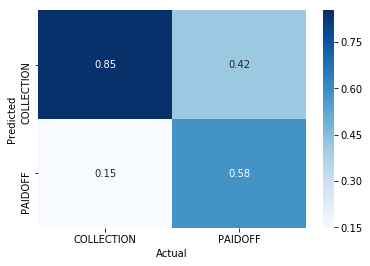

In [28]:
confV=pd.crosstab(bestSVM.predict(X_valid),y_valid,rownames=['Predicted'],colnames=['Actual'])
sn.heatmap(confV/confV.sum(axis=0),annot=True,cmap="Blues")
print(confV)

## Logistic Regression

Let's find the largest penalty parameter C providing the highest model accuracy (with the relative precision, in terms of standard deviation); since 'PAIDOFF' cases are much more than 'COLLECTION' cases in the available data, the (adjusted) balanced accuracy score is also calculated and selected as the figure of merit:

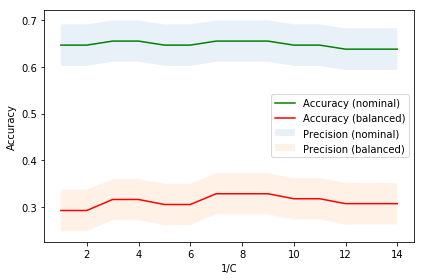

Maximum nominal accuracy 0.655 (with 0.044 precision) with at least 1/C = 3 inverse penalty parameter
Maximum balanced accuracy 0.329 (with 0.044 precision) with at least 1/C = 7 inverse penalty parameter


In [29]:
Ks=15
mean_acc=np.zeros(Ks-1)
bal_acc=np.zeros(Ks-1)
std_acc=np.zeros(Ks-1)
for n in range(1,Ks):    
    LR=LogisticRegression(C=1/n,solver='liblinear',class_weight='balanced').fit(X_train,y_train)
    yhat=LR.predict(X_valid)
    mean_acc[n-1]=metrics.accuracy_score(y_valid,yhat)
    bal_acc[n-1]=cohen_kappa_score(y_valid,yhat)
    std_acc[n-1]=np.std(yhat==y_valid)/np.sqrt(yhat.shape[0])
plt.plot(range(1,Ks),mean_acc,'g')
plt.plot(range(1,Ks),bal_acc,'r')
plt.fill_between(range(1,Ks),mean_acc-std_acc,mean_acc+std_acc,alpha=0.10)
plt.fill_between(range(1,Ks),bal_acc-std_acc,bal_acc+std_acc,alpha=0.10)
plt.legend(('Accuracy (nominal)','Accuracy (balanced)','Precision (nominal)','Precision (balanced)'))
plt.ylabel('Accuracy')
plt.xlabel('1/C')
plt.tight_layout()
plt.show()
bestKn=mean_acc.argmax()+1
bestKb=bal_acc.argmax()+1
print("Maximum nominal accuracy",round(mean_acc[bestKn-1],3),"(with",round(std_acc[bestKn-1],3),
      "precision) with at least 1/C =",bestKn,"inverse penalty parameter")
print("Maximum balanced accuracy",round(bal_acc[bestKb-1],3),"(with",round(std_acc[bestKb-1],3),
      "precision) with at least 1/C =",bestKb,"inverse penalty parameter")
bestLR=LogisticRegression(C=1/bestKb,solver='liblinear',class_weight='balanced').fit(X_train,y_train)

Actual      COLLECTION  PAIDOFF
Predicted                      
COLLECTION          24       37
PAIDOFF              3       52


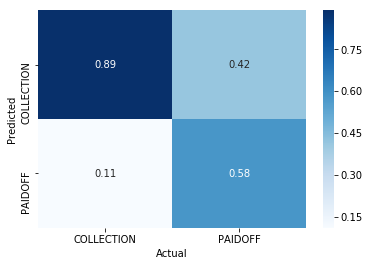

In [30]:
confV=pd.crosstab(bestLR.predict(X_valid),y_valid,rownames=['Predicted'],colnames=['Actual'])
sn.heatmap(confV/confV.sum(axis=0),annot=True,cmap="Blues")
print(confV)

# Model Evaluation using Test set

First, download and load the test set:

In [31]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-04-28 18:05:47--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-04-28 18:05:47 (683 MB/s) - ‘loan_test.csv’ saved [3642/3642]



## Load Test set for evaluation 

In [32]:
dFT=pd.read_csv('loan_test.csv')
dFT.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [33]:
print('Dataframe size:',dFT.shape)

Dataframe size: (54, 10)


## Clean and fix raw data

In [34]:
dfT=dFT.drop(columns='Unnamed: 0')
dfT.columns=['Loan','Status','Principal','Terms','Effective','Due','Age','Education','Gender']
dfT=dfT.replace({'Bechalor': 'Bachelor', 'college': 'College'})
dfT.head()

,Loan,Status,Principal,Terms,Effective,Due,Age,Education,Gender
0,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bachelor,female
1,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,College,male
4,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bachelor,male


## Convert to date-time object 

In [35]:
dfT['Effective']=pd.to_datetime(dfT['Effective'])
dfT['Due']=pd.to_datetime(dfT['Due'])
dfT.head()

,Loan,Status,Principal,Terms,Effective,Due,Age,Education,Gender
0,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bachelor,female
1,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,College,male
4,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bachelor,male


## Convert categorical features to numerical values

In [36]:
dfTe=dfT.replace({'High School or Below': 1, 'College': 2, 'Bachelor': 3, 'Master or Above': 4})
dfTe=dfTe.replace({'Terms': {7: 1, 15: 2, 30: 4}})
dfTe['GetDay']=dfTe['Effective'].dt.dayofweek+1
dfTe['DueDay']=dfTe['Due'].dt.dayofweek+1
dfTe=dfTe[['Loan','Status','Principal','Terms','GetDay','DueDay','Gender','Age','Education']]
dfTe=dfTe.replace({'male': 0, 'female': 1})
dfTe.head()

,Loan,Status,Principal,Terms,GetDay,DueDay,Gender,Age,Education
0,1,PAIDOFF,1000,4,4,5,1,50,3
1,5,PAIDOFF,300,1,5,4,0,35,4
2,21,PAIDOFF,1000,4,6,7,1,43,1
3,24,PAIDOFF,1000,4,6,7,0,26,2
4,35,PAIDOFF,800,2,7,7,0,29,3


## Prepare feature (extraction, selection, normalization)

In [37]:
dfTe['Weekend']=dfTe['GetDay'].apply(lambda x: 1 if (x>4) else 0)
dfTf=dfTe[['Principal','Terms','Weekend','Gender','Age','Education']]
dfTe=dfTe.drop(columns=['Weekend'])
dfTf.head()
yT=np.asarray(dfTe['Status'].values)
XT=np.asarray(dfTf.values.astype(float))
XTN=preprocessing.StandardScaler().fit(XT).transform(XT)

## Evaluate KNN

Best KNN Cohen: 0.0064
Best KNN Jaccard: 0.574074074074
Best KNN F1-score: 0.59214365881
Best KNN LogLoss: N.A.


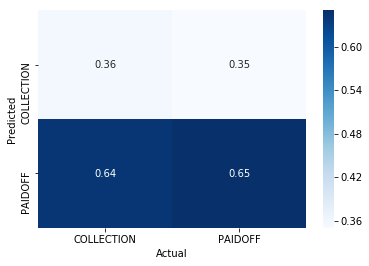

In [38]:
confKNN=pd.crosstab(bestKNN.predict(XTN),yT,rownames=['Predicted'],colnames=['Actual'])
sn.heatmap(confKNN/confKNN.sum(axis=0),annot=True,cmap="Blues")
print("Best KNN Cohen:",cohen_kappa_score(yT,bestKNN.predict(XTN)))
print("Best KNN Jaccard:",jaccard_similarity_score(yT,bestKNN.predict(XTN)))
print("Best KNN F1-score:",f1_score(yT,bestKNN.predict(XTN),average='weighted'))
print("Best KNN LogLoss: N.A.")

## Evaluate DT

Best DT Cohen: 0.392052980132
Best DT Jaccard: 0.685185185185
Best DT F1-score: 0.703769959584
Best DT LogLoss: N.A.


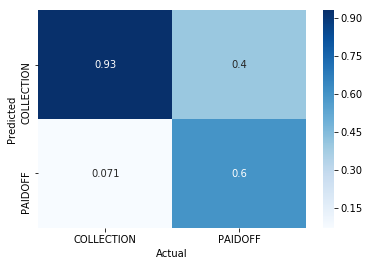

In [39]:
confDT=pd.crosstab(bestDT.predict(XTN),yT,rownames=['Predicted'],colnames=['Actual'])
sn.heatmap(confDT/confDT.sum(axis=0),annot=True,cmap="Blues")
print("Best DT Cohen:",cohen_kappa_score(yT,bestDT.predict(XTN)))
print("Best DT Jaccard:",jaccard_similarity_score(yT,bestDT.predict(XTN)))
print("Best DT F1-score:",f1_score(yT,bestDT.predict(XTN),average='weighted'))
print("Best DT LogLoss: N.A.")

## Evaluate SVM

Best SVM Cohen: 0.297397769517
Best SVM Jaccard: 0.611111111111
Best SVM F1-score: 0.629151649033
Best SVM LogLoss: N.A.


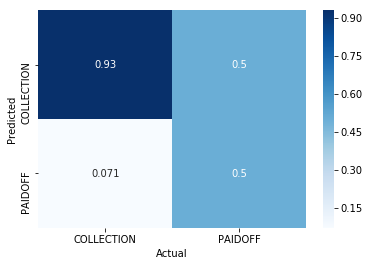

In [40]:
confSVM=pd.crosstab(bestSVM.predict(XTN),yT,rownames=['Predicted'],colnames=['Actual'])
sn.heatmap(confSVM/confSVM.sum(axis=0),annot=True,cmap="Blues")
print("Best SVM Cohen:",cohen_kappa_score(yT,bestSVM.predict(XTN)))
print("Best SVM Jaccard:",jaccard_similarity_score(yT,bestSVM.predict(XTN)))
print("Best SVM F1-score:",f1_score(yT,bestSVM.predict(XTN),average='weighted'))
print("Best SVM LogLoss: N.A.")

## Evaluate LR

Best LR Cohen: 0.272237196765
Best LR Jaccard: 0.62962962963
Best LR F1-score: 0.652076318743
Best LR LogLoss: 0.569574526226


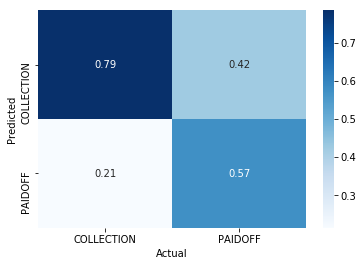

In [41]:
confLR=pd.crosstab(bestLR.predict(XTN),yT,rownames=['Predicted'],colnames=['Actual'])
sn.heatmap(confLR/confLR.sum(axis=0),annot=True,cmap="Blues")
print("Best LR Cohen:",cohen_kappa_score(yT,bestLR.predict(XTN)))
print("Best LR Jaccard:",jaccard_similarity_score(yT,bestLR.predict(XTN)))
print("Best LR F1-score:",f1_score(yT,bestLR.predict(XTN),average='weighted'))
print("Best LR LogLoss:",log_loss(yT,bestLR.predict_proba(XTN)))

## Report

Let's report the accuracy of the built models using different evaluation metrics:

| Algorithm | Jaccard | F1-score | LogLoss | Cohen |
|-----------|---------|----------|---------|-------|
| KNN       | 0.574   | 0.592    | N.A.    | 0.006 |
| DT        | 0.685   | 0.704    | N.A.    | 0.392 |
| SVM       | 0.611   | 0.629    | N.A.    | 0.297 |
| LR        | 0.630   | 0.652    | 0.570   | 0.272 |

As per the confusion matrices, note that false negatives (i.e., actually unpaid loans) are financially more detrimental than false positives (i.e., actually repaid loans).

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h4>Original Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>